<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/CDMX/Regresi%C3%B3n_No_Lineal/R_Simple_Lineal_para_comprobaci%C3%B3n_de_coeficientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Leer la base de la cdmx limpia
df= pd.read_csv("Mexico_Outliers_y_Categorización.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)


,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-28,city scrape,Alex,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Tiny home,Entire home/apt,1 bath,"[""Wifi"", ""Mini fridge"", ""Host greets you"", ""Pa...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(2 - 5) Reseñas mensuales moderadas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [ ]:
# Separamos los datos cuantitativos
dfModel_2 = df.select_dtypes(np.number)
dfModel_2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
0,4796027,2013,100.0,88.0,1.0,3,1,1,19.420630,-99.165860,...,56.0,0.41,1652.0,2.0,56.0,0,4,3,3,1
1,153786,2010,0.0,89.8,0.0,1,1,1,19.382830,-99.271780,...,0.0,1.13,3663.0,1.0,12.0,0,3,0,3,2
2,196253,2010,100.0,92.0,1.0,17,1,1,19.411620,-99.177940,...,64.0,0.42,1275.0,2.0,26.0,0,4,3,3,1
3,4647293,2013,100.0,96.0,1.0,1,1,1,19.439560,-99.172630,...,161.0,1.19,814.0,3.0,36.0,0,9,3,3,2
4,334451,2011,89.0,62.0,1.0,3,1,1,19.411520,-99.168570,...,49.0,0.32,1923.0,2.0,21.0,0,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,19255745,2014,100.0,100.0,1.0,13,1,1,19.404546,-99.168252,...,0.0,1.13,7850.0,2.0,31.0,0,4,3,3,1
26532,7681206,2013,97.0,91.0,0.0,33,1,1,19.420567,-99.166263,...,0.0,1.13,1478.0,2.0,48.0,0,4,3,3,1
26533,50951150,2015,100.0,100.0,2.0,12,1,1,19.408648,-99.170992,...,0.0,1.13,936.0,1.0,39.0,0,4,3,3,1
26534,147254250,2017,100.0,100.0,1.0,3,1,1,19.412367,-99.166447,...,0.0,1.13,768.0,2.0,10.0,0,4,3,3,1


In [ ]:
# Correlación de 'host_response_rate' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['host_response_rate'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,host_response_rate
host_response_rate,1.000000
host_response_time_num,0.794428
host_acceptance_rate,0.465825
host_is_superhost,0.216644
amenities_num,0.202848


In [ ]:
# Correlación de 'host_acceptance_rate ' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['host_acceptance_rate'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,host_acceptance_rate
host_acceptance_rate,1.000000
host_response_time_num,0.495164
host_response_rate,0.465825
instant_bookable,0.291472
host_is_superhost,0.272430
reviews_per_month,0.252430
number_of_reviews_ltm,0.249444
amenities_num,0.237314
number_of_reviews,0.210526


In [ ]:
# Correlación de 'host_total_listings_count  ' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['host_total_listings_count'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,host_total_listings_count
host_total_listings_count,1.000000
calculated_host_listings_count,0.691415
host_listings_count,0.568618
instant_bookable,0.229864


In [ ]:
# Correlación de 'accommodates  ' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['accommodates'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,accommodates
accommodates,1.000000
beds,0.671524
room_type_num,0.475335
bedrooms,0.426875
price,0.369485
bathroom_text_num,0.368452
bathrooms,0.291019
amenities_num,0.267763


In [ ]:
# Correlación de 'reviews_per_month' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['reviews_per_month'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,reviews_per_month
reviews_per_month,1.000000
number_of_reviews_ltm,0.664634
number_of_reviews_l30d,0.522355
number_of_reviews,0.494425
host_is_superhost,0.270771
host_acceptance_rate,0.252430
amenities_num,0.216616
host_response_time_num,0.203647


In [ ]:
# Correlación de 'price' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['price'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,price
price,1.000000
bathrooms,0.413776
bedrooms,0.404830
accommodates,0.369485
beds,0.323594
room_type_num,0.291113
bathroom_text_num,0.243637
amenities_num,0.212619


# **host_response_rate vs host_response_time_num**

<Axes: xlabel='host_response_time_num', ylabel='host_response_rate'>

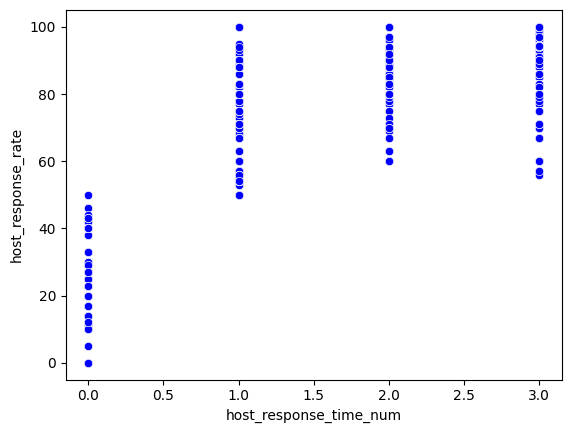

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x ='host_response_time_num' , y='host_response_rate', color="blue", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df[["host_response_time_num"]]
Var_Dep= df[["host_response_rate"]]

In [ ]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_time_num'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[19.93240647]]),
 'rank_': 1,
 'singular_': array([110.1835096]),
 'intercept_': array([39.53799708])}

In [ ]:
#Predecimos los valores
y_pred= model.predict(X=df[['host_response_time_num']])
y_pred

array([[99.33521649],
       [39.53799708],
       [99.33521649],
       ...,
       [99.33521649],
       [99.33521649],
       [99.33521649]])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predict1', y_pred)
df

,Predict1,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,99.335216,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,39.537997,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,99.335216,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,99.335216,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,59.470404,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,99.335216,2024-06-28,city scrape,Elvy,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,4.5 baths,...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26532,99.335216,2024-06-28,city scrape,Nicolas,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26533,99.335216,2024-06-28,city scrape,Sandra,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26534,99.335216,2024-06-28,city scrape,Salomon,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,1.5 baths,...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


<Axes: xlabel='host_response_time_num', ylabel='host_response_rate'>

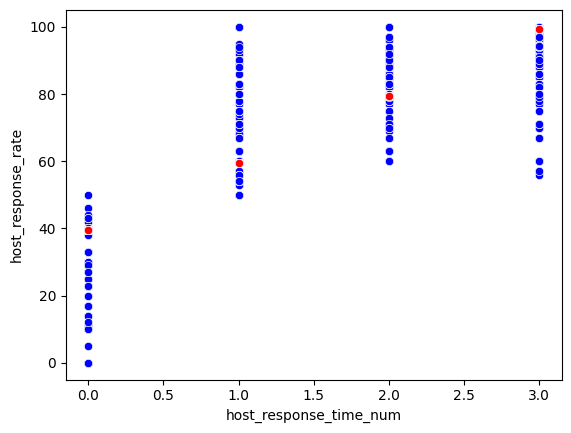

In [ ]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='host_response_time_num', y='host_response_rate', color='blue', data=df)
sns.scatterplot(x='host_response_time_num', y='Predict1', color='red', data=df)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.6311156127614912

In [ ]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.7944278524582904

# **host_acceptance_rate vs instant_bookable**

<Axes: xlabel='instant_bookable', ylabel='host_acceptance_rate'>

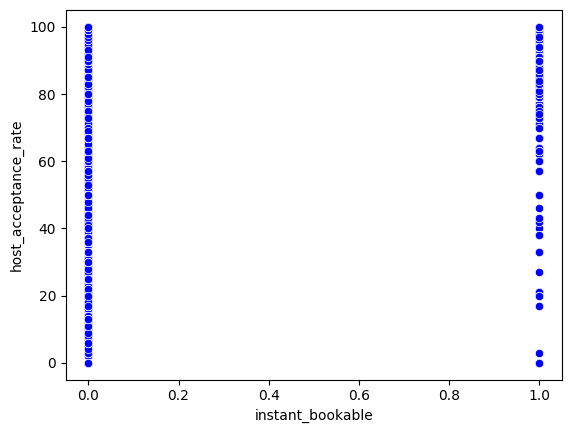

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x ='instant_bookable' , y='host_acceptance_rate', color="blue", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df[["instant_bookable"]]
Var_Dep= df[["host_acceptance_rate"]]

In [ ]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[13.07739556]]),
 'rank_': 1,
 'singular_': array([79.59775433]),
 'intercept_': array([84.63803246])}

In [ ]:
#Predecimos los valores
y_pred= model.predict(X=df[['instant_bookable']])
y_pred

array([[84.63803246],
       [84.63803246],
       [84.63803246],
       ...,
       [84.63803246],
       [84.63803246],
       [97.71542802]])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(1, 'Predict2', y_pred)
df

,Predict1,Predict2,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,99.335216,84.638032,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,39.537997,84.638032,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,99.335216,84.638032,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,99.335216,97.715428,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,59.470404,84.638032,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,99.335216,97.715428,2024-06-28,city scrape,Elvy,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26532,99.335216,84.638032,2024-06-28,city scrape,Nicolas,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26533,99.335216,84.638032,2024-06-28,city scrape,Sandra,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire rental unit,Entire home/apt,...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26534,99.335216,84.638032,2024-06-28,city scrape,Salomon,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


<Axes: xlabel='instant_bookable', ylabel='host_acceptance_rate'>

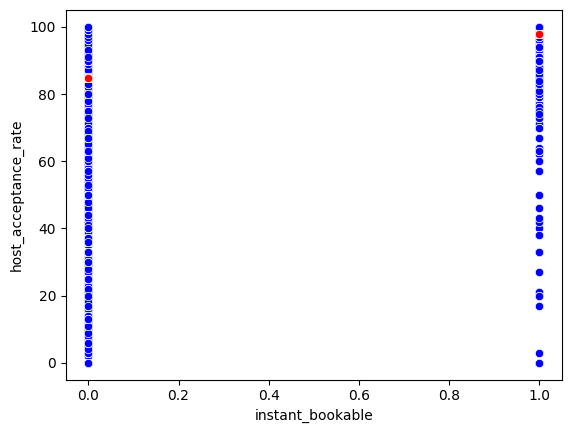

In [ ]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='instant_bookable', y='host_acceptance_rate', color='blue', data=df)
sns.scatterplot(x='instant_bookable', y='Predict2', color='red', data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.08495599556826938

In [ ]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.2914721179946195

# **host_total_listings_count vs calculated_host_listings_count**

<Axes: xlabel='calculated_host_listings_count', ylabel='host_total_listings_count'>

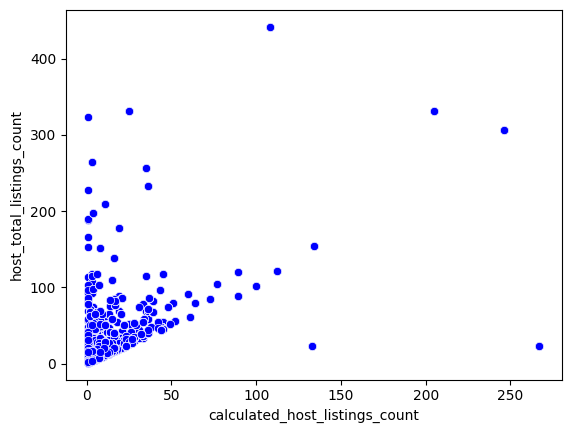

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x ='calculated_host_listings_count' , y='host_total_listings_count', color="blue", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df[["calculated_host_listings_count"]]
Var_Dep= df[["host_total_listings_count"]]

In [ ]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['calculated_host_listings_count'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.89518694]]),
 'rank_': 1,
 'singular_': array([7051.87233285]),
 'intercept_': array([7.51996492])}

In [ ]:
#Predecimos los valores
y_pred= model.predict(X=df[['calculated_host_listings_count']])
y_pred

array([[10.20552574],
       [ 8.41515186],
       [19.15739515],
       ...,
       [ 8.41515186],
       [10.20552574],
       [38.85150786]])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(2, 'Predict3', y_pred)
df

,Predict1,Predict2,Predict3,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,99.335216,84.638032,10.205526,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,39.537997,84.638032,8.415152,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,99.335216,84.638032,19.157395,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,99.335216,97.715428,8.415152,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,59.470404,84.638032,9.310339,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,99.335216,97.715428,14.681460,2024-06-28,city scrape,Elvy,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26532,99.335216,84.638032,17.367021,2024-06-28,city scrape,Nicolas,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26533,99.335216,84.638032,8.415152,2024-06-28,city scrape,Sandra,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire rental unit,...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26534,99.335216,84.638032,10.205526,2024-06-28,city scrape,Salomon,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


<Axes: xlabel='calculated_host_listings_count', ylabel='host_total_listings_count'>

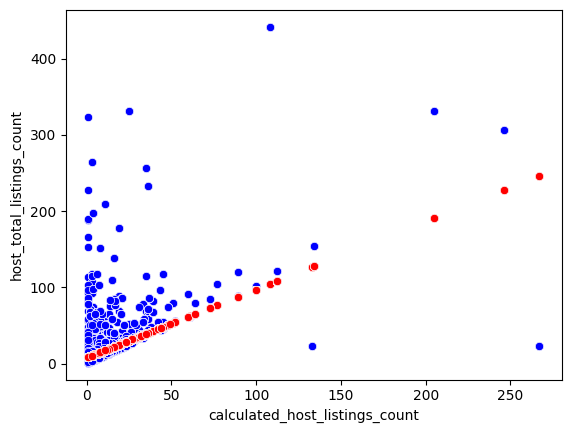

In [ ]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='calculated_host_listings_count', y='host_total_listings_count', color='blue', data=df)
sns.scatterplot(x='calculated_host_listings_count', y='Predict3', color='red', data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.478054444095079

In [ ]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.6914148133321119

# **Accommodates vs beds**

<Axes: xlabel='beds', ylabel='accommodates'>

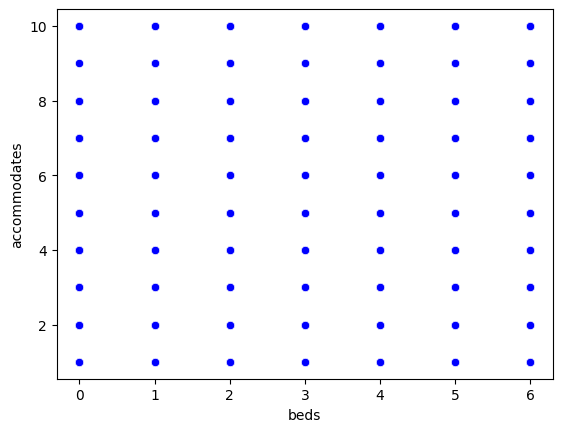

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x ='beds' , y='accommodates', color="blue", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df[["beds"]]
Var_Dep= df[["accommodates"]]

In [ ]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['beds'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.07124187]]),
 'rank_': 1,
 'singular_': array([179.56136878]),
 'intercept_': array([1.36278269])}

In [ ]:
#Predecimos los valores
y_pred= model.predict(X=df[['beds']])
y_pred

array([[3.50526643],
       [2.43402456],
       [3.50526643],
       ...,
       [2.43402456],
       [3.50526643],
       [3.50526643]])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(3, 'Predict4', y_pred)
df

,Predict1,Predict2,Predict3,Predict4,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,99.335216,84.638032,10.205526,3.505266,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,39.537997,84.638032,8.415152,2.434025,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,99.335216,84.638032,19.157395,3.505266,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,99.335216,97.715428,8.415152,4.576508,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,59.470404,84.638032,9.310339,3.505266,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,99.335216,97.715428,14.681460,3.505266,2024-06-28,city scrape,Elvy,within an hour,"['email', 'phone']",Cuauhtémoc,...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26532,99.335216,84.638032,17.367021,3.505266,2024-06-28,city scrape,Nicolas,within an hour,"['email', 'phone']",Cuauhtémoc,...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26533,99.335216,84.638032,8.415152,2.434025,2024-06-28,city scrape,Sandra,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26534,99.335216,84.638032,10.205526,3.505266,2024-06-28,city scrape,Salomon,within an hour,"['email', 'phone']",Cuauhtémoc,...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


<Axes: xlabel='beds', ylabel='accommodates'>

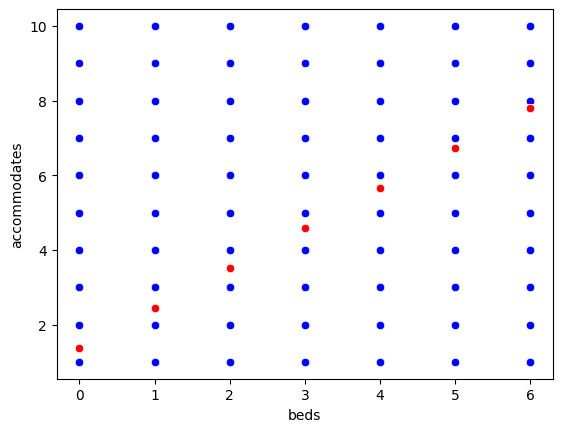

In [ ]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='beds', y='accommodates', color='blue', data=df)
sns.scatterplot(x='beds', y='Predict4', color='red', data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.4509448891323746

In [ ]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.6715243027116551

# **reviews_per_month vs number_of_reviews_ltm**

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

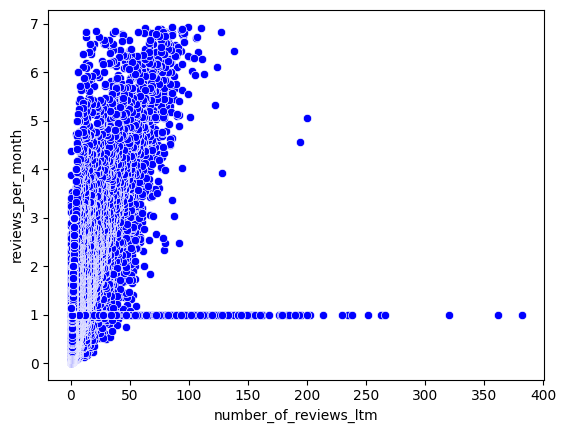

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x ='number_of_reviews_ltm' , y='reviews_per_month', color="blue", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df[["number_of_reviews_ltm"]]
Var_Dep= df[["reviews_per_month"]]

In [ ]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.04389926]]),
 'rank_': 1,
 'singular_': array([3242.21298832]),
 'intercept_': array([0.88354387])}

In [ ]:
#Predecimos los valores
y_pred= model.predict(X=df[['number_of_reviews_ltm']])
y_pred

array([[1.01524166],
       [0.88354387],
       [0.88354387],
       ...,
       [0.88354387],
       [0.88354387],
       [0.88354387]])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(4, 'Predict5', y_pred)
df

,Predict1,Predict2,Predict3,Predict4,Predict5,last_scraped,source,host_name,host_response_time,host_verifications,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,99.335216,84.638032,10.205526,3.505266,1.015242,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,39.537997,84.638032,8.415152,2.434025,0.883544,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,99.335216,84.638032,19.157395,3.505266,0.883544,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,99.335216,97.715428,8.415152,4.576508,1.146939,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,59.470404,84.638032,9.310339,3.505266,1.059141,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,99.335216,97.715428,14.681460,3.505266,0.883544,2024-06-28,city scrape,Elvy,within an hour,"['email', 'phone']",...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26532,99.335216,84.638032,17.367021,3.505266,0.883544,2024-06-28,city scrape,Nicolas,within an hour,"['email', 'phone']",...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26533,99.335216,84.638032,8.415152,2.434025,0.883544,2024-06-28,city scrape,Sandra,within an hour,"['email', 'phone', 'work_email']",...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26534,99.335216,84.638032,10.205526,3.505266,0.883544,2024-06-28,city scrape,Salomon,within an hour,"['email', 'phone']",...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

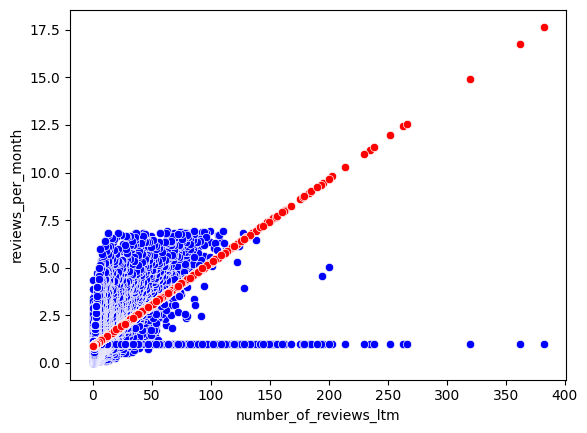

In [ ]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color='blue', data=df)
sns.scatterplot(x='number_of_reviews_ltm', y='Predict5', color='red', data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.4417380063462446

In [ ]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.6646337384953044

# **price vs bathrooms**

<Axes: xlabel='bathrooms', ylabel='price'>

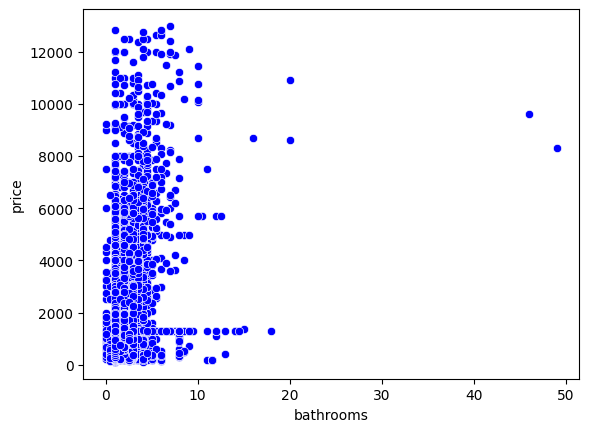

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x ='bathrooms' , y='price', color="blue", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df[["bathrooms"]]
Var_Dep= df[["price"]]

In [ ]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[492.60793033]]),
 'rank_': 1,
 'singular_': array([161.48324964]),
 'intercept_': array([573.07719809])}

In [ ]:
#Predecimos los valores
y_pred= model.predict(X=df[['bathrooms']])
y_pred

array([[1065.68512842],
       [1065.68512842],
       [3282.42081493],
       ...,
       [1065.68512842],
       [1311.98909359],
       [1065.68512842]])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(6, 'Predict6', y_pred)
df

,Predict1,Predict2,Predict3,Predict4,Predict5,last_scraped,Predict6,source,host_name,host_response_time,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,99.335216,84.638032,10.205526,3.505266,1.015242,2024-06-28,1065.685128,city scrape,Marco,within an hour,...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,39.537997,84.638032,8.415152,2.434025,0.883544,2024-06-27,1065.685128,city scrape,Dici,a few days or more,...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,99.335216,84.638032,19.157395,3.505266,0.883544,2024-06-28,3282.420815,city scrape,Fernando,within an hour,...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,99.335216,97.715428,8.415152,4.576508,1.146939,2024-06-28,1065.685128,city scrape,Martina,within an hour,...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,59.470404,84.638032,9.310339,3.505266,1.059141,2024-06-28,1065.685128,city scrape,Nicholas,within a day,...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,99.335216,97.715428,14.681460,3.505266,0.883544,2024-06-28,2789.812885,city scrape,Elvy,within an hour,...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26532,99.335216,84.638032,17.367021,3.505266,0.883544,2024-06-28,1065.685128,city scrape,Nicolas,within an hour,...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26533,99.335216,84.638032,8.415152,2.434025,0.883544,2024-06-28,1065.685128,city scrape,Sandra,within an hour,...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
26534,99.335216,84.638032,10.205526,3.505266,0.883544,2024-06-28,1311.989094,city scrape,Salomon,within an hour,...,(92 - 100%) Excelente,(2) Verificación moderada,1,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


<Axes: xlabel='bathrooms', ylabel='price'>

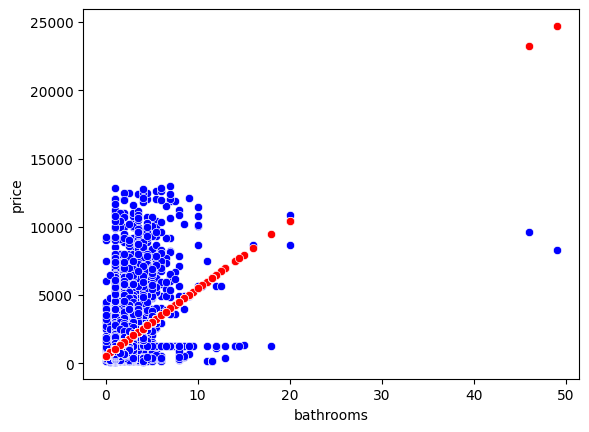

In [ ]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='bathrooms', y='price', color='blue', data=df)
sns.scatterplot(x='bathrooms', y='Predict6', color='red', data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.17121025344359486

In [ ]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.41377560759860516